In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
sns.set()

In [ ]:
raw_train = pd.read_csv('train_unscaled.csv')
raw_train

,Unnamed: 0,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_others
0,0,1,0,202500.0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,270000.0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,67500.0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,135000.0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,121500.0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,307506,0,0,157500.0,1,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
307507,307507,0,0,72000.0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
307508,307508,0,0,153000.0,1,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
307509,307509,1,0,171000.0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 63 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         307511 non-null  int64  
 1   TARGET                                             307511 non-null  int64  
 2   CNT_CHILDREN                                       307511 non-null  int64  
 3   AMT_INCOME_TOTAL                                   307511 non-null  float64
 4   FLAG_MOBIL                                         307511 non-null  int64  
 5   FLAG_EMP_PHONE                                     307511 non-null  int64  
 6   FLAG_WORK_PHONE                                    307511 non-null  int64  
 7   FLAG_CONT_MOBILE                                   307511 non-null  int64  
 8   FLAG_PHONE                                         307511 non-null  int64 

In [ ]:
raw_test = pd.read_csv('test_unscaled.csv')
raw_test

,Unnamed: 0,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_others,NAME_INCOME_TYPE_Maternity leave,NAME_FAMILY_STATUS_Unknown
0,0,0,135000.0,1,1,0,1,0,1,2.0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,99000.0,1,1,0,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,202500.0,1,1,0,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,3,2,315000.0,1,1,0,1,1,0,4.0,...,0,0,0,1,0,0,0,0,0,0
4,4,1,180000.0,1,1,1,1,0,0,3.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,48739,0,121500.0,1,1,1,1,1,0,1.0,...,0,0,0,0,0,0,0,1,0,0
48740,48740,2,157500.0,1,1,0,1,0,0,4.0,...,0,0,0,1,0,0,0,0,0,0
48741,48741,1,202500.0,1,1,0,1,1,0,3.0,...,0,0,0,0,0,0,0,1,0,0
48742,48742,0,225000.0,1,1,1,1,1,0,2.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train = raw_train.drop(['Unnamed: 0'], axis=1)
test = raw_test.drop(['Unnamed: 0'],axis=1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 62 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   TARGET                                             307511 non-null  int64  
 1   CNT_CHILDREN                                       307511 non-null  int64  
 2   AMT_INCOME_TOTAL                                   307511 non-null  float64
 3   FLAG_MOBIL                                         307511 non-null  int64  
 4   FLAG_EMP_PHONE                                     307511 non-null  int64  
 5   FLAG_WORK_PHONE                                    307511 non-null  int64  
 6   FLAG_CONT_MOBILE                                   307511 non-null  int64  
 7   FLAG_PHONE                                         307511 non-null  int64  
 8   FLAG_EMAIL                                         307511 non-null  int64 

In [ ]:
train['Age'] = train['Age'].astype(int)
#train['AMT_INCOME_TOTAL'] = train['AMT_INCOME_TOTAL'].astype(int)
#train['CNT_FAM_MEMBERS'] = train['CNT_FAM_MEMBERS'].astype(int)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 62 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   TARGET                                             307511 non-null  int64  
 1   CNT_CHILDREN                                       307511 non-null  int64  
 2   AMT_INCOME_TOTAL                                   307511 non-null  float64
 3   FLAG_MOBIL                                         307511 non-null  int64  
 4   FLAG_EMP_PHONE                                     307511 non-null  int64  
 5   FLAG_WORK_PHONE                                    307511 non-null  int64  
 6   FLAG_CONT_MOBILE                                   307511 non-null  int64  
 7   FLAG_PHONE                                         307511 non-null  int64  
 8   FLAG_EMAIL                                         307511 non-null  int64 

In [ ]:
train['AMT_INCOME_TOTAL'] = train['AMT_INCOME_TOTAL'].astype(int)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 62 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   TARGET                                             307511 non-null  int64  
 1   CNT_CHILDREN                                       307511 non-null  int64  
 2   AMT_INCOME_TOTAL                                   307511 non-null  int64  
 3   FLAG_MOBIL                                         307511 non-null  int64  
 4   FLAG_EMP_PHONE                                     307511 non-null  int64  
 5   FLAG_WORK_PHONE                                    307511 non-null  int64  
 6   FLAG_CONT_MOBILE                                   307511 non-null  int64  
 7   FLAG_PHONE                                         307511 non-null  int64  
 8   FLAG_EMAIL                                         307511 non-null  int64 

In [ ]:
train['CNT_FAM_MEMBERS'] = train['CNT_FAM_MEMBERS'].astype(int)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 62 columns):
 #   Column                                             Non-Null Count   Dtype
---  ------                                             --------------   -----
 0   TARGET                                             307511 non-null  int64
 1   CNT_CHILDREN                                       307511 non-null  int64
 2   AMT_INCOME_TOTAL                                   307511 non-null  int64
 3   FLAG_MOBIL                                         307511 non-null  int64
 4   FLAG_EMP_PHONE                                     307511 non-null  int64
 5   FLAG_WORK_PHONE                                    307511 non-null  int64
 6   FLAG_CONT_MOBILE                                   307511 non-null  int64
 7   FLAG_PHONE                                         307511 non-null  int64
 8   FLAG_EMAIL                                         307511 non-null  int64
 9   CNT_FAM_MEMBERS

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 61 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   CNT_CHILDREN                                       48744 non-null  int64  
 1   AMT_INCOME_TOTAL                                   48744 non-null  float64
 2   FLAG_MOBIL                                         48744 non-null  int64  
 3   FLAG_EMP_PHONE                                     48744 non-null  int64  
 4   FLAG_WORK_PHONE                                    48744 non-null  int64  
 5   FLAG_CONT_MOBILE                                   48744 non-null  int64  
 6   FLAG_PHONE                                         48744 non-null  int64  
 7   FLAG_EMAIL                                         48744 non-null  int64  
 8   CNT_FAM_MEMBERS                                    48744 non-null  float64
 9   MONTHS

In [ ]:
test['Age'] = test['Age'].astype(int)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 61 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   CNT_CHILDREN                                       48744 non-null  int64  
 1   AMT_INCOME_TOTAL                                   48744 non-null  float64
 2   FLAG_MOBIL                                         48744 non-null  int64  
 3   FLAG_EMP_PHONE                                     48744 non-null  int64  
 4   FLAG_WORK_PHONE                                    48744 non-null  int64  
 5   FLAG_CONT_MOBILE                                   48744 non-null  int64  
 6   FLAG_PHONE                                         48744 non-null  int64  
 7   FLAG_EMAIL                                         48744 non-null  int64  
 8   CNT_FAM_MEMBERS                                    48744 non-null  float64
 9   MONTHS

In [ ]:
test['AMT_INCOME_TOTAL'] = test['AMT_INCOME_TOTAL'].astype(int)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 61 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   CNT_CHILDREN                                       48744 non-null  int64  
 1   AMT_INCOME_TOTAL                                   48744 non-null  int64  
 2   FLAG_MOBIL                                         48744 non-null  int64  
 3   FLAG_EMP_PHONE                                     48744 non-null  int64  
 4   FLAG_WORK_PHONE                                    48744 non-null  int64  
 5   FLAG_CONT_MOBILE                                   48744 non-null  int64  
 6   FLAG_PHONE                                         48744 non-null  int64  
 7   FLAG_EMAIL                                         48744 non-null  int64  
 8   CNT_FAM_MEMBERS                                    48744 non-null  float64
 9   MONTHS

In [ ]:
test['CNT_FAM_MEMBERS'] = test['CNT_FAM_MEMBERS'].astype(int)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 61 columns):
 #   Column                                             Non-Null Count  Dtype
---  ------                                             --------------  -----
 0   CNT_CHILDREN                                       48744 non-null  int64
 1   AMT_INCOME_TOTAL                                   48744 non-null  int64
 2   FLAG_MOBIL                                         48744 non-null  int64
 3   FLAG_EMP_PHONE                                     48744 non-null  int64
 4   FLAG_WORK_PHONE                                    48744 non-null  int64
 5   FLAG_CONT_MOBILE                                   48744 non-null  int64
 6   FLAG_PHONE                                         48744 non-null  int64
 7   FLAG_EMAIL                                         48744 non-null  int64
 8   CNT_FAM_MEMBERS                                    48744 non-null  int64
 9   MONTHS_BALANCE              

In [ ]:
#declare the targets and inputs
targets = train['TARGET']
inputs = train.drop(['TARGET'],axis=1)

In [ ]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs & tests (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)
scaler.fit(test)

StandardScaler()

In [ ]:
inputs_scaled = scaler.transform(inputs)
test_scaled = scaler.transform(test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


Counter({0: 24825, 1: 24825})
Class=0, n=24825 (50.00%)
Class=1, n=24825 (50.00%)


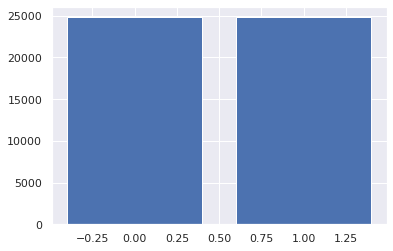

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
undersample = RandomUnderSampler(random_state=0)
x, y = undersample.fit_resample(inputs_scaled, targets)
# summarize distribution
counter = Counter(y)
print(counter)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.2f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
logit_model=sm.Logit(targets,inputs_scaled)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.271437
         Iterations: 35


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.032      
Dependent Variable: TARGET           AIC:              167061.8747
Date:               2023-01-28 15:35 BIC:              167710.6869
No. Observations:   307511           Log-Likelihood:   -83470.    
Df Model:           60               LL-Null:          -86271.    
Df Residuals:       307450           LLR p-value:      0.0000     
Converged:          0.0000           Scale:            1.0000     
No. Iterations:     35.0000                                       
-------------------------------------------------------------------
         Coef.    Std.Err.     z      P>|z|     [0.025      0.975] 
-------------------------------------------------------------------
x1      -5.3029  1156.4773   -0.0046  0.9963  -2271.9568  2261.3510
x2       0.0018     0.0017    1.0591  0.2896     -0.0015     0.0051
x3       0.0925   357.3680    0.0003  0.9998   -700.3360   700.5209
x4      -0.2534

In [ ]:
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [ ]:
reg = LogisticRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)
y_predict = reg.predict(x_test)
print('Accuracy Score from Logistic Regression is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))


Accuracy Score from Logistic Regression is 0.91867
       0  1
0  56501  0
1   5002  0


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
reg.predict(test_scaled)

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_predict)
print(cm)

[[56501     0]
 [ 5002     0]]


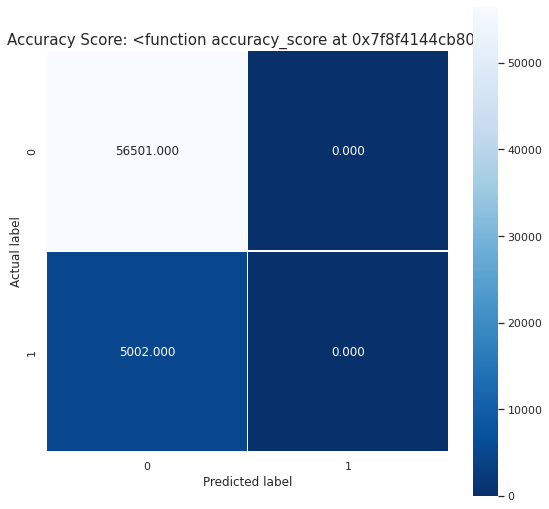

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score)
plt.title(all_sample_title, size = 15);

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16
                              )
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

Accuracy Score is 0.91867
       0  1
0  56501  0
1   5002  0


In [ ]:
cm = metrics.confusion_matrix(y_test, y_predict)
print(cm)

[[56501     0]
 [ 5002     0]]


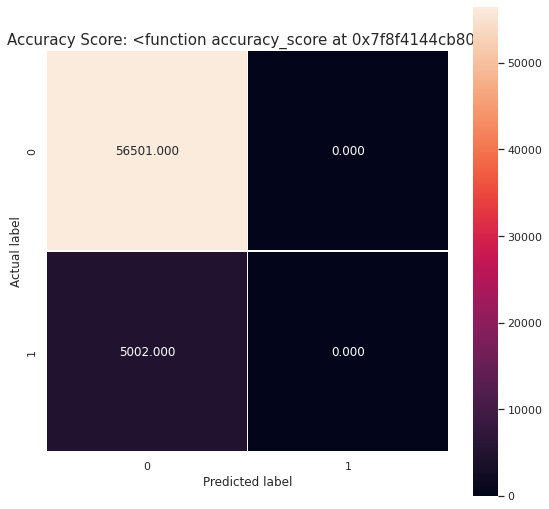

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score)
plt.title(all_sample_title, size = 15);

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=12, min_samples_split=8,
                               random_state=1024)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print('Accuracy Score from DecisionTreeClassifier is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))


Accuracy Score from DecisionTreeClassifier is 0.91563
       0    1
0  56280  221
1   4968   34


In [ ]:
cm = metrics.confusion_matrix(y_test, y_predict)
print(cm)

[[56280   221]
 [ 4968    34]]


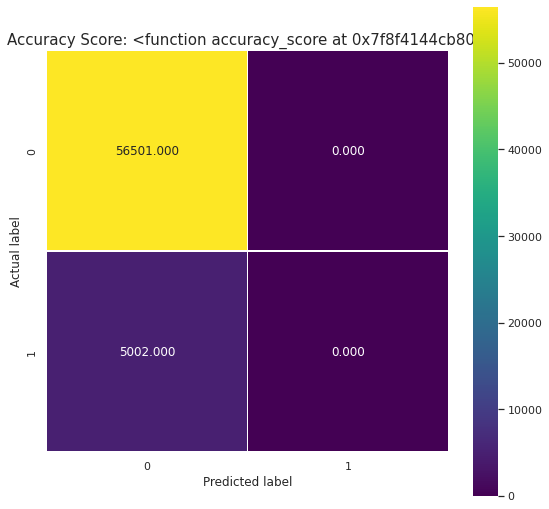

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap='viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score)
plt.title(all_sample_title, size = 15);

In [ ]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(num_leaves=31,
                       max_depth=8, 
                       learning_rate=0.02,
                       n_estimators=250,
                       subsample = 0.8,
                       colsample_bytree =0.8
                      )
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))


Accuracy Score is 0.91867
       0  1
0  56501  0
1   5002  0


In [ ]:
cm = metrics.confusion_matrix(y_test, y_predict)
print(cm)

[[56501     0]
 [ 5002     0]]


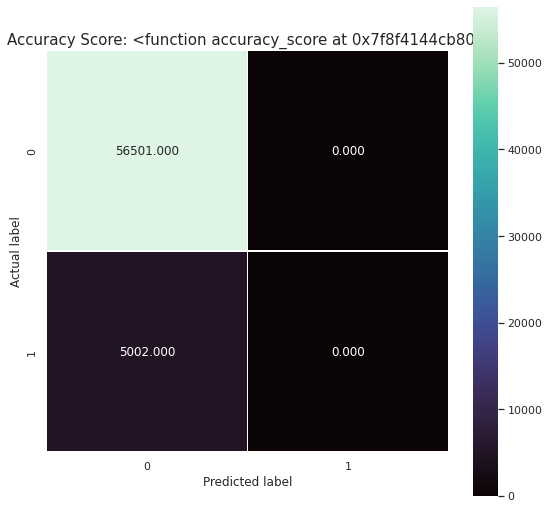

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap='mako');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score)
plt.title(all_sample_title, size = 15);